#**Salifort Motors Employee Retention Project: Predicting Attrition Using Python Machine Learning**

###**Sahar Simeonov**
###**Data Scientist**
08/22/2024

##**About the company**
Salifort Motors is a fictional French-based alternative energy vehicle manufacturer. Its global workforce of over 100,000 employees research, design, construct, validate, and distribute electric, solar, algae, and hydrogen-based vehicles. Salifort’s end-to-end vertical integration model has made it a global leader at the intersection of alternative energy and automobiles.        

##**Business case**
Currently, there is a high rate of turnover among Salifort employees. (Note: In this context, turnover data includes both employees who choose to quit their job and employees who are let go). Salifort’s senior leadership team is concerned about how many employees are leaving the company. Salifort strives to create a corporate culture that supports employee success and professional development. Further, the high turnover rate is costly in the financial sense. Salifort makes a big investment in recruiting, training, and upskilling its employees. As a data specialist working for Salifort Motors, I have received the results of a recent employee survey. The senior leadership team has tasked me with analyzing the data to come up with ideas for how to increase employee retention. To help with this, they would like me to design a model that predicts whether an employee will leave the company based on their  department, number of projects, average monthly hours, and any other data points I suggest to be helpful. 

##**Value of deliverable**
If Salifort could predict whether an employee will leave the company, and discover the reasons behind their departure, they could better understand the problem and develop a solution. For this deliverable, I am asked to choose a method to approach this data challenge based on my prior course work. I am to select either a regression model or a machine learning model to predict whether an employee will leave the company. A good model will help the company increase retention and job satisfaction for current employees, and save money and time training new employees. 

##**Import Packages**


In [1]:
# For data manipulation
import numpy as np
import pandas as pd

# For data cleaning
%pip install pyjanitor
import janitor

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

%pip install xgboost

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle
import os

Note: you may need to restart the kernel to use updated packages.


/home/codespace/.python/current/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=1700) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


##**Load Dataset**

Data source: [Kaggle]<https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv>.

In [8]:
# Load dataset into a dataframe

df = pd.read_csv('https://raw.githubusercontent.com/sahbanu/Salifort-Retention-ML-Project/main/HR_comma_sep.csv?token=GHSAT0AAAAAACWGKGB3JCLED5XU7RGPQAKCZWMSWYA')

# Display first few rows of the dataframe

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


##**Exploratory Data Analysis**


In [9]:
#Exploratory data analysis

# Gather basic information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [10]:
# Gather descriptive statistics about the data

df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [11]:
# Display all column names
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [12]:
# Data cleaning
# Clean the column names
df_cleaned = df.clean_names()

# Display the cleaned DataFrame
df_cleaned.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [13]:
# Rename columns as needed
df = df_cleaned.rename(columns={'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure'})
# Display all column names after the update
for col in df.columns:
    print(col)

satisfaction_level
last_evaluation
number_project
average_monthly_hours
tenure
work_accident
left
promotion_last_5years
department
salary


In [15]:
# Dictionary with column descriptions
column_descriptions = {
    'satisfaction_level': 'Employee-reported job satisfaction level [0-1]',
    'last_evaluation': 'The score of the employee’s most recent performance evaluation [0-1]',
    'number_project': 'Total number of projects the employee has been involved in during their time at the company',
    'average_monthly_hours':'Average number of hours employee works per month',
    'tenure':'number of years the employee has spent working at the company',
    'work_accident':' whether the employee has been involved in a work-related accident',
    'left':'whether the employee has left the company',
    'promotion_last_5years':'whether the employee has been promoted in the last five years',
    'department':'The department in which the employee works',
    'salary':'The salary level of the employee (low, medium, or high)'
}

# Convert the dictionary into a DataFrame
column_info_df = pd.DataFrame(list(column_descriptions.items()), columns=['Column Name', 'Description'])

# Set pandas options to display full content in cells
pd.set_option('display.max_colwidth', None)

# Display the DataFrame as a beautifully formatted table without the index
column_info_df.style.hide(axis='index')

Column Name,Description
satisfaction_level,Employee-reported job satisfaction level [0-1]
last_evaluation,The score of the employee’s most recent performance evaluation [0-1]
number_project,Total number of projects the employee has been involved in during their time at the company
average_monthly_hours,Average number of hours employee works per month
tenure,number of years the employee has spent working at the company
work_accident,whether the employee has been involved in a work-related accident
left,whether the employee has left the company
promotion_last_5years,whether the employee has been promoted in the last five years
department,The department in which the employee works
salary,"The salary level of the employee (low, medium, or high)"


In [16]:
# Check for missing values
missing_values = df.isna().sum()

# Filter out columns with no missing values
missing_columns = missing_values[missing_values > 0]

if missing_columns.empty:
    # If there are no missing values
    final_message = "No missing values found in the dataset."
else:
    # Create the message for each column with missing values
    messages = [f"Column '{col}' has {count} missing values." for col, count in missing_columns.items()]
    # Combine the messages into one output
    final_message = "\n".join(messages)

# Print the final message
print(final_message)

No missing values found in the dataset.


In [17]:
# Calculate the number of duplicate rows
num_duplicates = df.duplicated().sum()

# Calculate the percentage of duplicates
total_rows = len(df)
percentage_duplicates = (num_duplicates / total_rows) * 100

# Create the message with embedded values
message = f"Identified {num_duplicates} duplicate rows, accounting for approximately {percentage_duplicates:.2f}% of the dataset."

print(message)

Identified 3008 duplicate rows, accounting for approximately 20.05% of the dataset.


##**Exploratory Data Analysis**
- The dataset contains 15,000 rows (including a header) and 10 columns.
- The 'Left' column serves as the target variable, with the remaining 9 columns as features.
- There are no missing values in the dataset.
- We identified 3,008 duplicate rows, representing approximately 20.05% of the dataset. Given the presence of continuous variables across multiple columns, these duplicates are unlikely to be valid entries and therefore removed.

In [18]:
# Drop duplicates and save the resulting dataframe in a new variable
df_cleaned = df.drop_duplicates(keep='first')

# Check for duplicates
df_cleaned.duplicated().sum()

np.int64(0)

In [19]:
# Check the structure and basic information of the cleaned dataframe
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


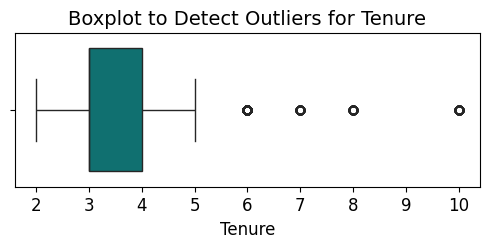

In [20]:
#Check for outliers

# Create a boxplot to visualize distribution of tenure and detect any outliers
plt.figure(figsize=(6,2))
plt.title('Boxplot to Detect Outliers for Tenure', fontsize=14) 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df_cleaned['tenure'],color='teal')
# Adding x-axis label for clarity
plt.xlabel('Tenure', fontsize=12)  
plt.show()

In [21]:
# Count the number of rows where 'tenure' is considered an outlier
## Note: While IQR is typically used to determine outliers, the boxplot suggests tenure >= 6 as an outlier threshold.

outlier_count = (df_cleaned['tenure'] >= 6).sum()

# Display the result
print(f"Number of rows containing outliers (tenure >= 6): {outlier_count}")

Number of rows containing outliers (tenure >= 6): 824


##**Insight**
We  identified 824 rows with employees having a tenure of 6 years or more, which are considered outliers.

In [22]:
# Get counts of people who left vs. stayed
counts = df_cleaned['left'].value_counts()

# Calculate percentages
percentages = df_cleaned['left'].value_counts(normalize=True) * 100

# Create a DataFrame to display counts and percentages
summary_df = pd.DataFrame({
    'Count': counts,
    'Percentage': percentages
}).reset_index()

# Rename columns for clarity
summary_df.columns = ['Left (1=Yes, 0=No)', 'Count', 'Percentage']

# Display the summary DataFrame
print(summary_df)

   Left (1=Yes, 0=No)  Count  Percentage
0                   0  10000    83.39588
1                   1   1991    16.60412


/tmp/ipykernel_4920/1880464730.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_salary, x='proportion', y='salary', palette='mako')


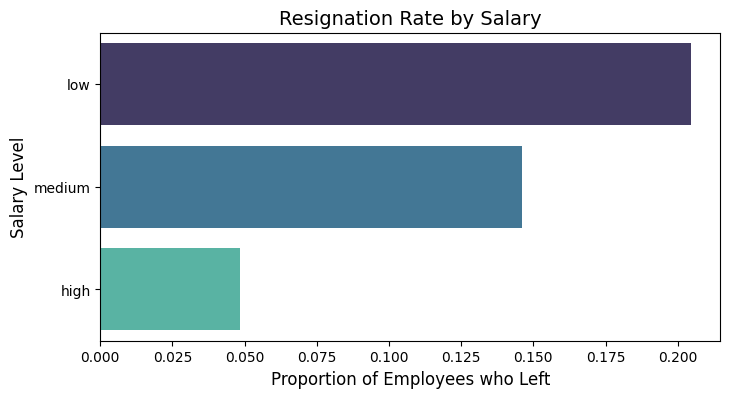

In [23]:
# Calculate resignation rate by salary
df_salary = df_cleaned.groupby('salary')['left'].value_counts(normalize=True).reset_index(name='proportion')
df_salary = df_salary[df_salary['left'] == 1]  # Filter to show only those who left
df_salary = df_salary.sort_values('proportion', ascending=False)  # Sort by proportion

# Plotting
plt.figure(figsize=(8, 4))  
sns.barplot(data=df_salary, x='proportion', y='salary', palette='mako')  
plt.title('Resignation Rate by Salary', fontsize=14)
plt.xlabel('Proportion of Employees who Left', fontsize=12)
plt.ylabel('Salary Level', fontsize=12)
plt.show()

In [24]:
# Convert salary to numeric codes
salary_mapping = {'low': 1, 'medium': 2, 'high': 3}
df_cleaned['salary'] = df_cleaned['salary'].map(salary_mapping)

# Check data types
print(df_cleaned.dtypes)

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
tenure                     int64
work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                     int64
dtype: object


/tmp/ipykernel_4920/2026517853.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['salary'] = df_cleaned['salary'].map(salary_mapping)


In [25]:
print(df_cleaned['department'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


/tmp/ipykernel_4920/3530682853.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_department, x='proportion', y='department', palette='mako')  # Explicitly define data


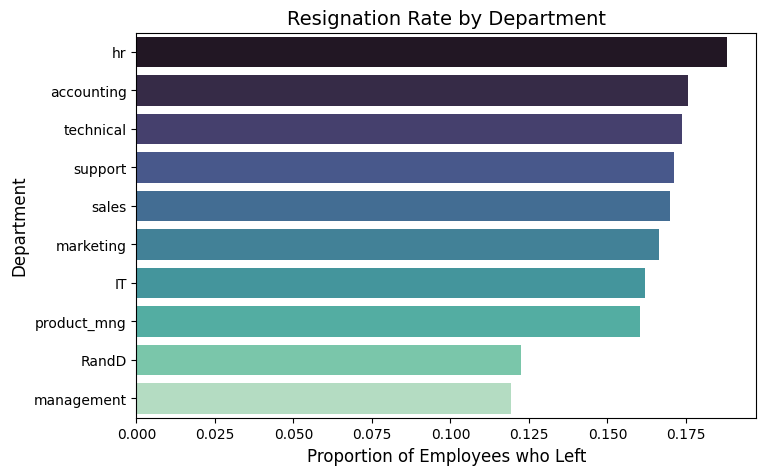

In [27]:
# Calculate resignation rate by department
df_department = df_cleaned.groupby('department')['left'].value_counts(normalize=True).reset_index(name='proportion')
df_department = df_department[df_department['left'] == 1]  # Filter to show only those who left
df_department = df_department.sort_values('proportion', ascending=False)  # Sort by proportion in descending order

# Plotting
plt.figure(figsize=(8, 5))  # Adjusted size for better readability
sns.barplot(data=df_department, x='proportion', y='department', palette='mako')  # Explicitly define data
plt.title('Resignation Rate by Department', fontsize=14)
plt.xlabel('Proportion of Employees who Left', fontsize=12)
plt.ylabel('Department', fontsize=12)
plt.show()

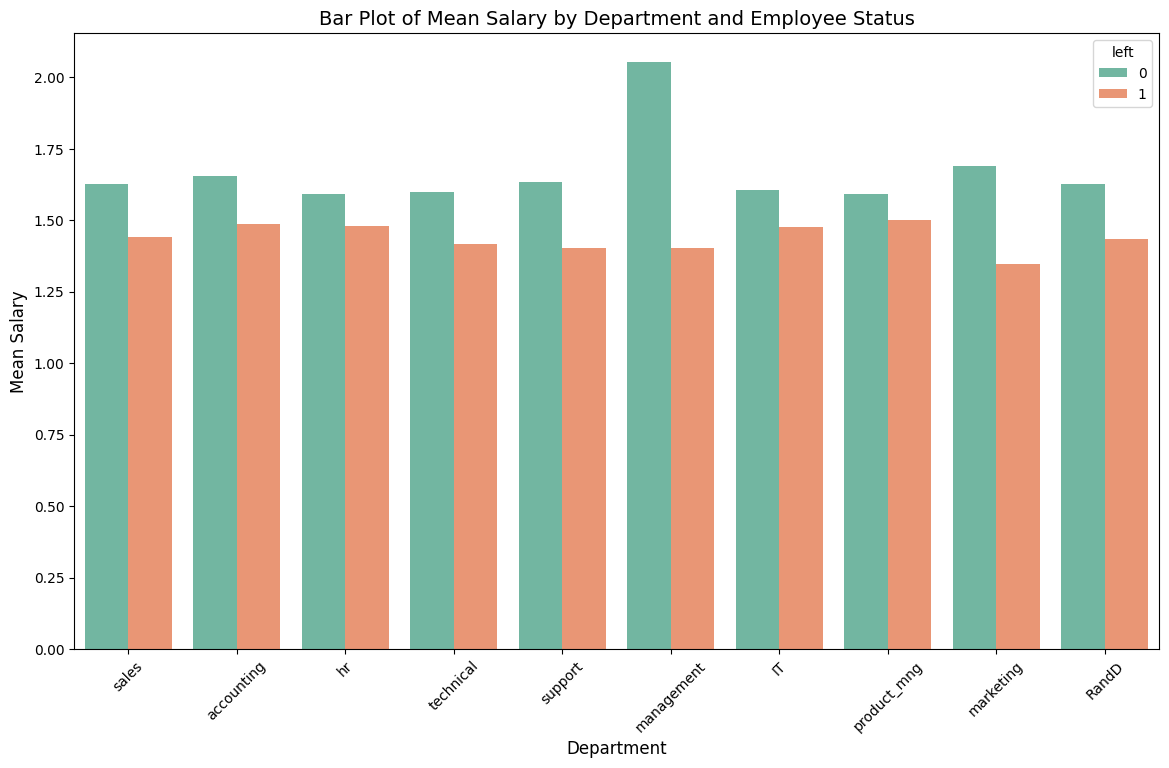

In [28]:
# Set figure and axes
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

# Define custom order for departments
department_order = ['sales', 'accounting', 'hr', 'technical', 'support', 'management', 'IT', 'product_mng', 'marketing', 'RandD']

# Bar Plot for Mean Salary
mean_salaries = df_cleaned.groupby(['department', 'left'])['salary'].mean().reset_index()
sns.barplot(data=mean_salaries, x='department', y='salary', hue='left', order=department_order, palette='Set2', ax=ax)

# Set plot titles and labels
ax.set_title('Bar Plot of Mean Salary by Department and Employee Status', fontsize=14)
ax.tick_params(axis='x', rotation=45)
ax.set_xlabel('Department', fontsize=12)
ax.set_ylabel('Mean Salary', fontsize=12)

# Display the plot
plt.show()

##**Insight**
It appears that salary is an important factor in employee attrition.In every department, employees who left the company tend to have a lower average salary than their colleagues who remained, as illustrated by the bar plot.

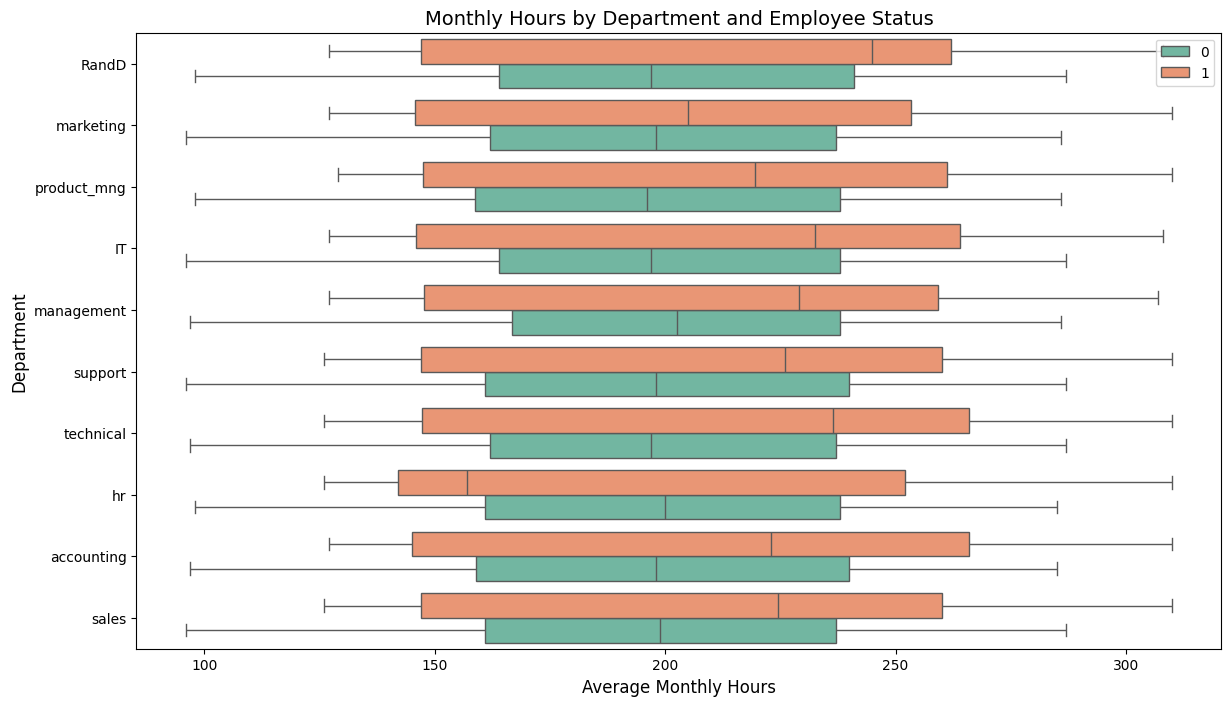

In [30]:
# Set figure and axes
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

# Define custom order for departments
department_order = ['sales', 'accounting', 'hr', 'technical', 'support', 'management', 'IT', 'product_mng', 'marketing', 'RandD']

# Boxplot for Average Monthly Hours by Department and Employee Status
sns.boxplot(data=df_cleaned, x='average_monthly_hours', y='department', hue='left', order=department_order, orient='h', palette='Set2', ax=ax)
ax.invert_yaxis()
ax.set_title('Monthly Hours by Department and Employee Status', fontsize=14)
ax.set_xlabel('Average Monthly Hours', fontsize=12)
ax.set_ylabel('Department', fontsize=12)
ax.legend(loc='upper right')  

# Display the plot
plt.show()

##**Insights**
In every department, employees who left the company tend to have worked longer hours per month on average compared to their peers who stayed, as shown by the stacked box plot.

*Note: assume a standard 40-hour workweek and two weeks of vacation per year, then the average number of working hours per month for full time employees = (50 weeks * 40 hours) / 12 months = 166.67 hours per month*

/tmp/ipykernel_4920/2568525230.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(data=agg_data, x='department', y='mean', hue='left', palette='Set2', ci=None)


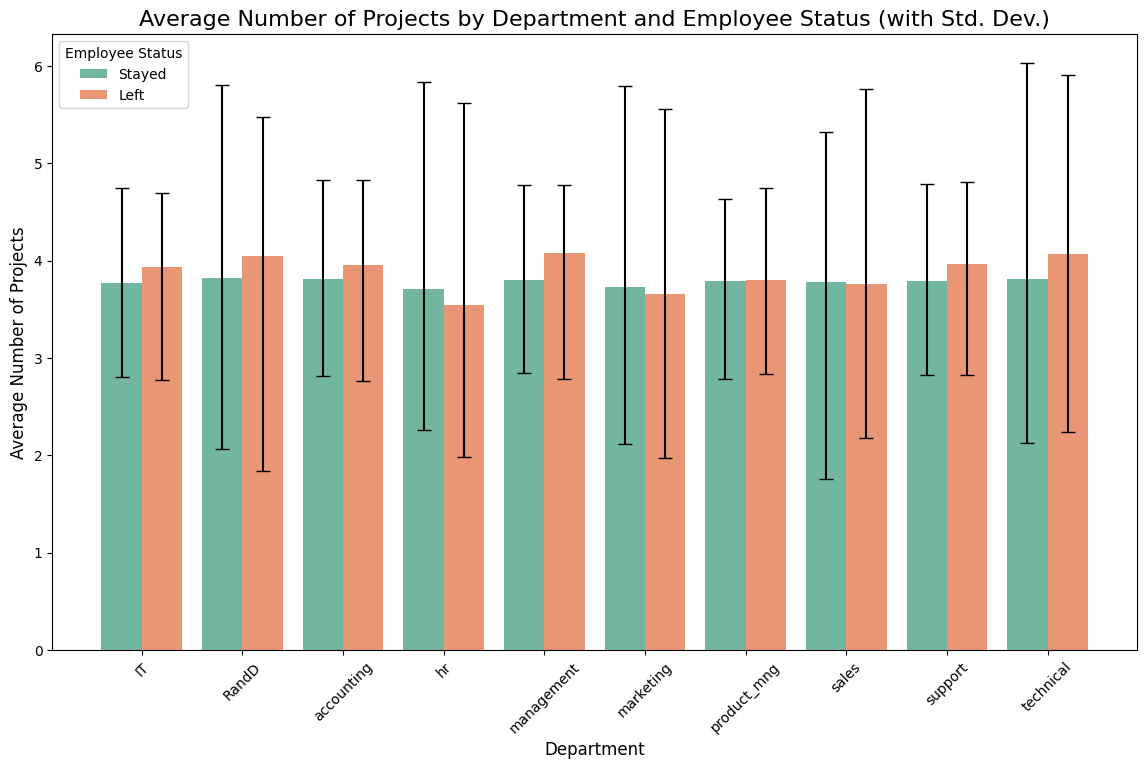

In [31]:
# Distribution showing the average number of projects by department for those who left versus those who stayed

# Step 1: Aggregate the data with both mean and standard deviation
agg_data = df_cleaned.groupby(['department', 'left'])['number_project'].agg(['mean', 'std']).reset_index()

# Step 2: Create the bar plot without CI since we're adding custom error bars
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(data=agg_data, x='department', y='mean', hue='left', palette='Set2', ci=None)

# Step 3: Add custom error bars
for index, row in agg_data.iterrows():
    department = row['department']
    hue_value = row['left']
    mean_val = row['mean']
    std_val = row['std']

    # Find the position of the bar corresponding to the department and left
    bar = bar_plot.patches[index]
    bar_width = bar.get_width()
    x = bar.get_x() + bar_width / 2

    # Plot the error bars
    plt.errorbar(x, mean_val, yerr=std_val, fmt='none', c='black', capsize=5)

# Step 4: Customize the plot
plt.title('Average Number of Projects by Department and Employee Status (with Std. Dev.)', fontsize=16)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Average Number of Projects', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Employee Status', labels=['Stayed', 'Left'])

plt.show()

###**Insights**
There appears to be no significant difference in the number of projects handled by employees who left compared to those who stayed within each department. Both groups were equally engaged in their work, as illustrated by the bar plot

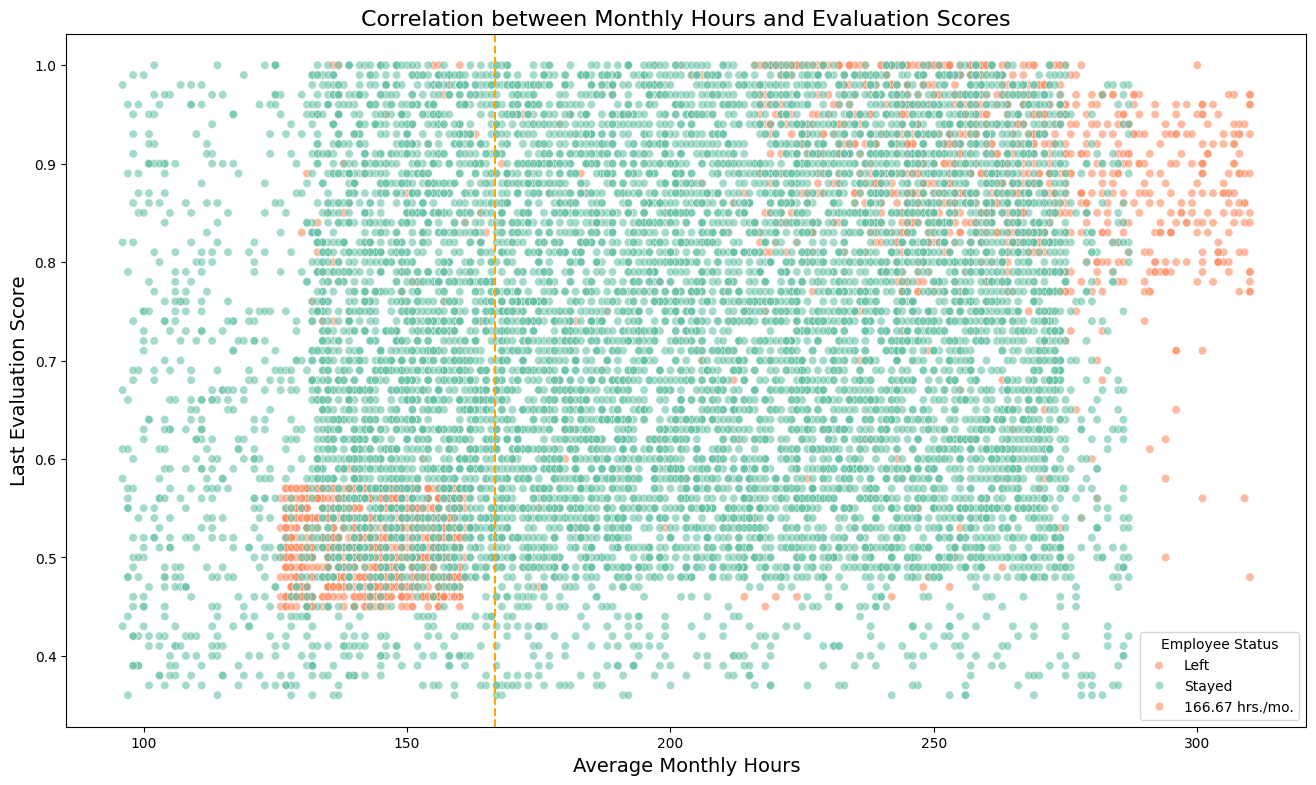

In [32]:
# Explore whether there's a correlation between working long hours and receiving high evaluation scores

# Set the figure size for better visibility
plt.figure(figsize=(16, 9))

# Create a scatterplot of `average_monthly_hours` versus `last_evaluation`
sns.scatterplot(data=df_cleaned, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.6, palette='Set2')

# Add a vertical line to indicate the average monthly hours threshold
plt.axvline(x=166.67, color='#ffa600', linestyle='--', label='166.67 hrs./mo.')

# Customize the legend for clarity
plt.legend(title='Employee Status', labels=['Left', 'Stayed', '166.67 hrs./mo.'])

# Set the title and axis labels for context
plt.title('Correlation between Monthly Hours and Evaluation Scores', fontsize=16)
plt.xlabel('Average Monthly Hours', fontsize=14)
plt.ylabel('Last Evaluation Score', fontsize=14)

# Display the plot
plt.show()

##**Insight**
The scatterplot reveals two distinct groups among the employees who left: those who were overworked but performed exceptionally well, and those who worked slightly fewer than the average 166.67 hours per month, receiving lower evaluation scores. Additionally, the plot suggests a correlation between the number of hours worked and evaluation scores.

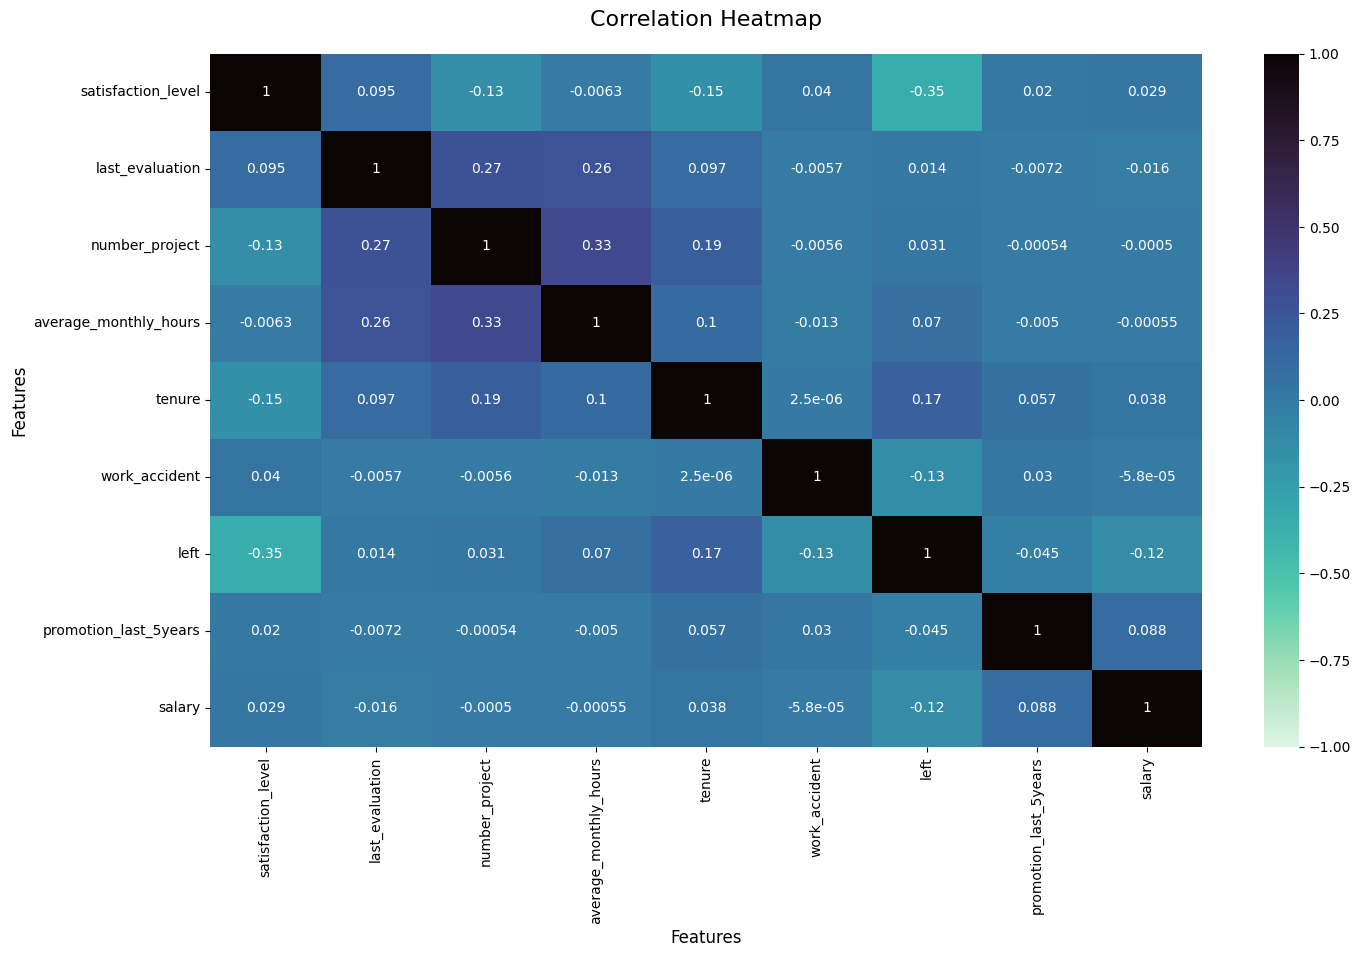

In [33]:
#check for strong correlations between variables in the data
# Set the figure size for better visibility
plt.figure(figsize=(16, 9))

# Select numeric columns only
numeric_df = df_cleaned.select_dtypes(include='number')

# Plot the correlation heatmap
heatmap = sns.heatmap(
    numeric_df.corr(),
    vmin=-1, vmax=1,
    annot=True, 
    cmap=sns.color_palette("mako_r", as_cmap=True),
    annot_kws={"size": 10}
)

# Add a title with padding
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 16}, pad=20)

# Add labels to axes for clarity
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Display the plot
plt.show()

##**Insight**
 The correlation heatmap reveals that the number of projects, monthly hours, and evaluation scores are positively correlated with each other. Additionally, there is a negative correlation between employee attrition and satisfaction levels.


## **Data preperation for model building**

In [35]:
# Data preparation 
# Prepare data by encoding and dummying necessary columns
# Encode the `salary` column as an ordinal numeric category
df_ml = df_cleaned.copy()
df_ml['salary'] = (
    df_ml['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column, drop_first=True to avoid multicollinearity
df_ml = pd.get_dummies(df_ml, drop_first=True)

In [36]:
#Split Data into Features and Target

# Split X, y variables
y = df_ml['left']
X = df_ml.drop('left', axis=1)

# Split train, test data (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=44)


##**Random Forest Model**

In [37]:
#Define and train the random forest model

# Define model, parameters, scoring, etc
rf_estimator = RandomForestClassifier(random_state=44)
param_grid = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [None, 3, 6, 9],
    'min_samples_leaf': [1, 5, 10, 50, 200],
    'criterion': ['gini', 'entropy']
}
scoring_metrics = ['roc_auc', 'precision', 'recall', 'accuracy', 'f1']

# Set up GridSearchCV
rf_model = GridSearchCV(estimator=rf_estimator,
                        param_grid=param_grid,
                        scoring=scoring_metrics,
                        n_jobs=-1,
                        cv=4,
                        refit='f1')

# Fit the random forest model to the training data
%time rf_model.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=4920) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/home/codespace/.local/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=4920) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/home/codespace/.local/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=4920) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()


CPU times: user 5.19 s, sys: 519 ms, total: 5.71 s
Wall time: 6min 55s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=44), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 6, 9],
                         'min_samples_leaf': [1, 5, 10, 50, 200],
                         'n_estimators': [50, 100, 200, 300, 500]},
             refit='f1',
             scoring=['roc_auc', 'precision', 'recall', 'accuracy', 'f1'])

In [42]:
#Save the trained model using pickle
# Define a local path to the folder where you want to save the model
model_path = 'models'

# Define functions to pickle the model and read in the model
def write_pickle(model_path, model_object, save_as:str):
    # Ensure the directory exists
    if not os.path.exists(model_path):
        os.makedirs(model_path)
    
    # Save the model
    with open(os.path.join(model_path, save_as + '.pickle'), 'wb') as to_write:
        pickle.dump(model_object, to_write)

# Save the model
write_pickle(model_path, rf_model, 'hr_rf_model')


In [44]:
#Load the saved model and evaluate
# Define function to read the model from pickle
def read_pickle(model_path, saved_model_name:str):
    with open(os.path.join(model_path, saved_model_name + '.pickle'), 'rb') as to_read:
        model = pickle.load(to_read)
    return model

# Load the model
rf_model_loaded = read_pickle(model_path, 'hr_rf_model')

# Identify the best F1 score achieved by the random forest model on the training set
print("Best F1 Score:", rf_model_loaded.best_score_)

# Identify the optimal values for the parameters of the random forest model
print("Best Parameters:", rf_model_loaded.best_params_)


Best F1 Score: 0.9488974275857378
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 500}


In [64]:
def get_scores(model_name: str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    Parameters:
        model_name (str):  How you want your model to be named in the output table.
        model:             A fit GridSearchCV object.
        X_test_data:       numpy array or pandas DataFrame of X_test data.
        y_test_data:       numpy array or pandas Series of y_test data.

    Returns:
        pd.DataFrame: A DataFrame of precision, recall, f1, accuracy, and AUC scores for your model.
    '''

    # Use best_estimator_ if available (GridSearchCV object)
    try:
        preds = model.best_estimator_.predict(X_test_data)
    except AttributeError:
        preds = model.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    # Create a DataFrame for the scores
    table = pd.DataFrame({
        'model': [model_name],
        'precision': [precision], 
        'recall': [recall],
        'f1': [f1],
        'accuracy': [accuracy],
        'AUC': [auc]
    })
  
    return table

In [74]:
# Use the best-performing model to predict on the test set

# Get predictions and evaluation metrics on the test data
rf_model_test_scores = get_scores('Random Forest Test', rf_model, X_test, y_test)

# Display the evaluation scores without index column
rf_model_test_scores.style.hide(axis='index')


model,precision,recall,f1,accuracy,AUC
Random Forest Test,0.989059,0.907631,0.946597,0.982989,0.952815


#**XGBoost Model**

In [54]:
# Gradient Boosting Model with XGBoost

# Define model, parameters, scoring, etc.
xgb_estimator = XGBClassifier(random_state=44)
param_grid = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 5, 10, 50, 200],
    'learning_rate': [0.01, 0.03, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0],               # Optional: controls overfitting
    'colsample_bytree': [0.6, 0.8, 1.0]         # Optional: controls overfitting
}
scoring = ['roc_auc', 'precision', 'recall', 'accuracy', 'f1']

# Set up GridSearchCV
xgb_model = GridSearchCV(estimator=xgb_estimator,
                         param_grid=param_grid,
                         scoring=scoring,
                         n_jobs=-1,
                         cv=4,
                         refit='f1')

# Fit the model
%time xgb_model.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=4920) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/home/codespace/.local/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=4920) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` paramet

CPU times: user 27.6 s, sys: 4.21 s, total: 31.8 s
Wall time: 24min


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=44, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.03, 0.1, 0.3],
                         'max_depth': [3, 6, 9],
                         'min_child_weight': [1, 5, 10, 50, 200],
                         'n_estimators': [50, 100, 200, 300, 500],
                         'subsample': [0.6, 0.8, 1.0]},
             refit='f1',
             scoring=['roc_auc', 'precision', 'recall', 'accuracy', 'f1'])

In [55]:
#Save the trained model using pickle
# Define a local path to the folder where you want to save the model
model_path = 'models'

# Define functions to pickle the model and read in the model
def write_pickle(model_path, model_object, save_as:str):
    # Ensure the directory exists
    if not os.path.exists(model_path):
        os.makedirs(model_path)
    with open(os.path.join(model_path, save_as + '.pickle'), 'wb') as to_write:
        pickle.dump(model_object, to_write)

# Save the model
write_pickle(model_path, xgb_model, 'hr_xgb_model')


In [56]:
#Load the saved model and evaluate
# Define function to read the model from pickle
def read_pickle(model_path, saved_model_name:str):
    with open(os.path.join(model_path, saved_model_name + '.pickle'), 'rb') as to_read:
        model = pickle.load(to_read)
    return model

# Load the model
xgb_model_loaded = read_pickle(model_path, 'hr_xgb_model')

# Identify the best F1 score achieved by the XGBoost model on the training set
print("Best F1 Score:", xgb_model_loaded.best_score_)

# Identify the optimal values for the parameters of the XGBoost model
print("Best Parameters:", xgb_model_loaded.best_params_)

Best F1 Score: 0.9516060589609379
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1.0}


In [65]:
def get_scores(model_name: str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    Parameters:
        model_name (str):  How you want your model to be named in the output table.
        model:             A fit GridSearchCV object.
        X_test_data:       numpy array or pandas DataFrame of X_test data.
        y_test_data:       numpy array or pandas Series of y_test data.

    Returns:
        pd.DataFrame: A DataFrame of precision, recall, f1, accuracy, and AUC scores for your model.
    '''

    # Use best_estimator_ if available (GridSearchCV object)
    try:
        preds = model.best_estimator_.predict(X_test_data)
    except AttributeError:
        preds = model.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    # Create a DataFrame for the scores
    table = pd.DataFrame({
        'model': [model_name],
        'precision': [precision], 
        'recall': [recall],
        'f1': [f1],
        'accuracy': [accuracy],
        'AUC': [auc]
    })
  
    return table

In [73]:
from IPython.display import display

# Get predictions and evaluation metrics on the test data
rf_model_test_scores = get_scores('Random Forest Model', rf_model, X_test, y_test)
xgb_scores = get_scores('XGBoost Model', xgb_model, X_test, y_test)

# Combine the results into one DataFrame
combined_scores = pd.concat([rf_model_test_scores, xgb_scores], ignore_index=True)

# Display the combined DataFrame without index column
display(combined_scores.style.hide(axis='index'))


model,precision,recall,f1,accuracy,AUC
Random Forest Model,0.989059,0.907631,0.946597,0.982989,0.952815
XGBoost Model,0.989130,0.913655,0.949896,0.983989,0.955827


##**Intrepretation**
Interpretation:
Precision:Measures the proportion of positive identifications that were actually correct.
XGBoost: 0.989130
Random Forest: 0.989059
Conclusion: XGBoost has slightly higher precision, meaning it makes marginally fewer false positive predictions.

Recall:Measures the proportion of actual positives that were correctly identified.
XGBoost: 0.913655
Random Forest: 0.907631
Conclusion: XGBoost has slightly higher recall, meaning it correctly identifies more of the actual positives.

F1 Score:The harmonic mean of precision and recall. It balances the two metrics.
XGBoost: 0.949896
Random Forest: 0.946597
Conclusion: XGBoost has a higher F1 score, suggesting a better balance between precision and recall.

Accuracy:Measures the proportion of correctly identified instances (both positive and negative) over the total number of instances.
XGBoost: 0.983989
Random Forest: 0.982989
Conclusion: XGBoost has a higher accuracy, meaning it correctly classifies more instances overall.

AUC(Area Under the ROC Curve): Measures the ability of the model to distinguish between positive and negative classes.
XGBoost: 0.955827
Random Forest: 0.952815
Conclusion: XGBoost has a slightly higher AUC, indicating better overall performance in distinguishing between classes.

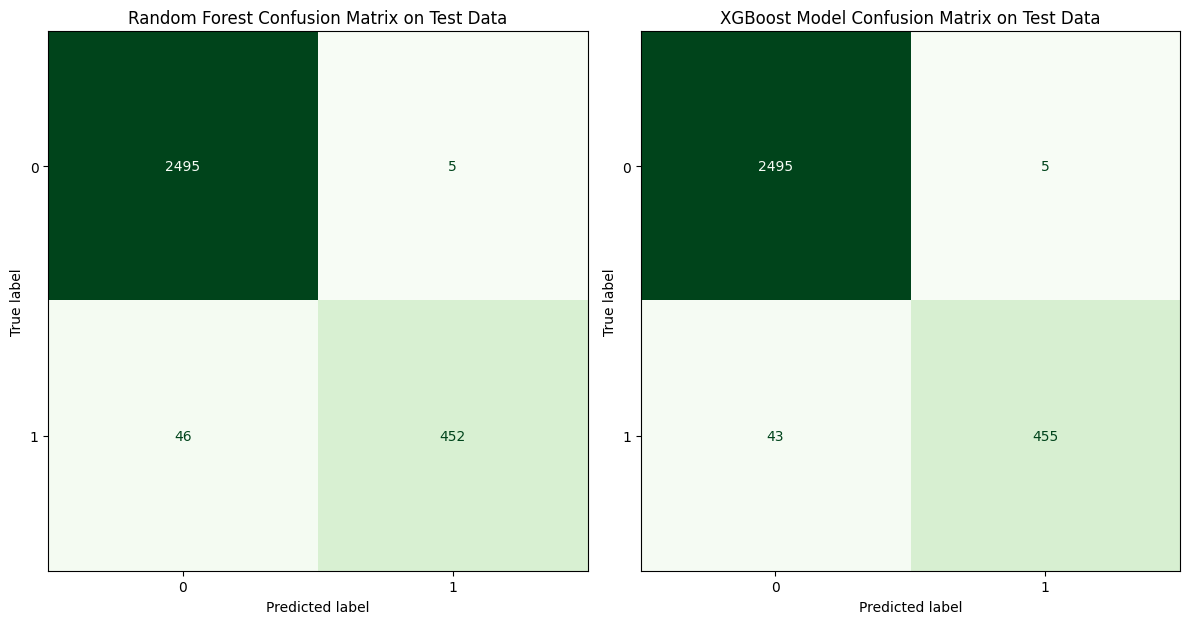

In [76]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Set figure and axes for a 1x2 grid
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix for Random Forest model
rf_preds = rf_model.best_estimator_.predict(X_test)
rf_cm = confusion_matrix(y_test, rf_preds, labels=rf_model.classes_)
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf_model.classes_)
rf_disp.plot(ax=ax[0], cmap='Greens', values_format='', colorbar=False)
ax[0].set_title('Random Forest Confusion Matrix on Test Data')
ax[0].grid(False)

# Plot confusion matrix for XGBoost model
xgb_preds = xgb_model.best_estimator_.predict(X_test)
xgb_cm = confusion_matrix(y_test, xgb_preds, labels=xgb_model.classes_)
xgb_disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=xgb_model.classes_)
xgb_disp.plot(ax=ax[1], cmap='Greens', values_format='', colorbar=False)
ax[1].set_title('XGBoost Model Confusion Matrix on Test Data')
ax[1].grid(False)

plt.tight_layout()
plt.show()


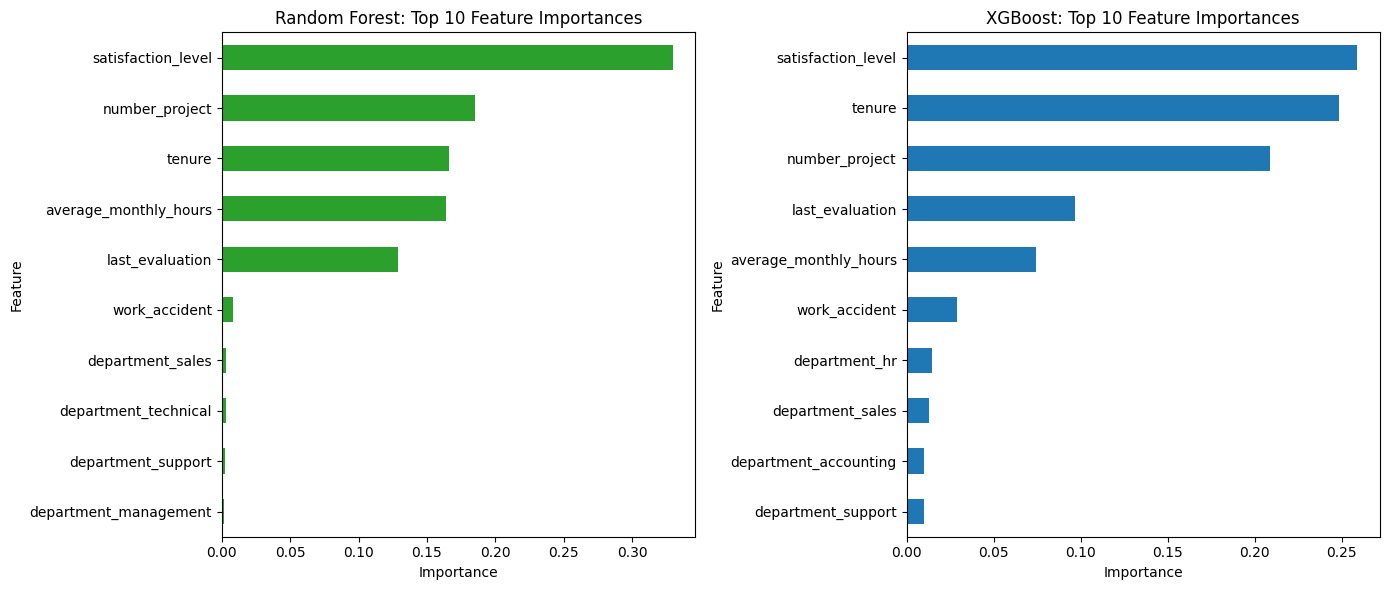

In [78]:
# Assuming you have already trained models and have X, rf_model, and xgb_model

# Set figure and axes for a 1x2 grid
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot feature importances for Random Forest model
rf_feat_impt = rf_model.best_estimator_.feature_importances_

# Get indices of the top 10 features
rf_top_indices = np.argpartition(rf_feat_impt, -10)[-10:]

# Get the names and importances of the top 10 features
rf_top_features = X.columns[rf_top_indices]
rf_top_importances = rf_feat_impt[rf_top_indices]

# Create a DataFrame for better handling and sorting
rf_feature_importance_df = pd.DataFrame({"Feature": rf_top_features, "Importance": rf_top_importances})
rf_feature_importance_df = rf_feature_importance_df.sort_values("Importance")

# Plot Random Forest feature importances
rf_feature_importance_df.plot(kind='barh', x="Feature", y="Importance", color='#2ca02c', ax=ax[0], legend=False)
ax[0].set_title("Random Forest: Top 10 Feature Importances", fontsize=12)
ax[0].set_xlabel("Importance")
ax[0].set_ylabel("Feature")

# Plot feature importances for XGBoost model
xgb_feat_impt = xgb_model.best_estimator_.feature_importances_

# Get indices of the top 10 features
xgb_top_indices = np.argpartition(xgb_feat_impt, -10)[-10:]

# Get the names and importances of the top 10 features
xgb_top_features = X.columns[xgb_top_indices]
xgb_top_importances = xgb_feat_impt[xgb_top_indices]

# Create a DataFrame for better handling and sorting
xgb_feature_importance_df = pd.DataFrame({"Feature": xgb_top_features, "Importance": xgb_top_importances})
xgb_feature_importance_df = xgb_feature_importance_df.sort_values("Importance")

# Plot XGBoost feature importances
xgb_feature_importance_df.plot(kind='barh', x="Feature", y="Importance", color='#1f77b4', ax=ax[1], legend=False)
ax[1].set_title("XGBoost: Top 10 Feature Importances", fontsize=12)
ax[1].set_xlabel("Importance")
ax[1].set_ylabel("Feature")

plt.tight_layout()
plt.show()

##**Conclusion of Model Results**

We developed two models to predict employee attrition:

- Random Forest (RF) model
- XGBoost (XGB) model

Based on the evaluation metrics, the **XGBoost model** emerges as the better predictor:

**Higher Metrics Across the Board:** The XGBoost model outperforms the Random Forest model in terms of precision, recall, F1 score, accuracy, and AUC. These metrics indicate that the XGBoost model is slightly more effective in correctly identifying instances of attrition and distinguishing between classes.

**Model Performance Indicators:** Generally, higher values in precision, recall, F1 score, accuracy, and AUC signify better model performance. Therefore, the marginally superior metrics of the XGBoost model suggest it may be the better choice for this classification task.

**Top Factors Related to Attrition:**
In both models, the following factors were most strongly associated with employee attrition, listed in order of importance according to the XGBoost model:

1. Employee satisfaction level
2. Tenure
3. Number of projects the employee works on
4. Last evaluation score
5. Average monthly working hours


##**Key Insights**:
**Salary Differences**: Employees who left the company generally had lower average salaries compared to those who stayed, as depicted in the bar plot.
**Workload**: Departing employees worked more hours per month on average than their peers who remained, a trend highlighted by the stacked box plot. Given a standard 40-hour workweek with two weeks of vacation, the expected average is 166.67 hours per month.
**Project Engagement**: There was no significant difference in the number of projects handled by employees who left versus those who stayed, indicating similar levels of engagement across both groups, as shown by the bar plot.
**Performance and Workload**: The scatterplot indicates two distinct groups among those who left: overworked high performers and those with fewer working hours and lower evaluation scores. The data suggests a relationship between hours worked and evaluation scores.
**Correlation Analysis**: The heatmap shows a positive correlation between the number of projects, monthly hours, and evaluation scores. Additionally, there is a negative correlation between employee attrition and satisfaction levels.

##**Recommendations:**
To improve employee retention, the following actions are recommended:

**Project Management:** Implement a cap on the number of projects an employee can handle to prevent burnout.

**Career Development:** Consider promoting employees who have been with the company for at least four years or investigate why employees at this tenure are particularly dissatisfied.

**Workload Transparency:** Ensure employees are informed about overtime pay policies and clearly communicate expectations around workload and time off.

**Cultural Assessment:** Conduct company-wide and team-specific discussions to assess and address work culture issues.

**Performance Evaluation:** Avoid reserving high evaluation scores exclusively for employees working 200+ hours per month. Introduce a proportionate reward scale that acknowledges effort and contribution levels across the board.
